# TP3 :  Introduction à la bibliothèque $\mathtt{Pandas}$

# Partie 2 : La bibliothèque $\mathtt{Pandas}$ <a id="pandas"></a>

### Importer les modules nécessaires

Dans la suite des TP, nous allons travailler en Python3 avec des bibliothèques suivantes :
- **numpy** : pour faire des maths
- **matplotlib** : pour tracer des figures
- **pandas** : pour le traitement des données et pour faire des statistiques

Au début de chaque session, il est obligatoire d'importer les modules, qu'on utlisera par la suite.

Pour ce notebook, nous aurons besoin seulement des deux modules suivants :

In [56]:
import numpy as np
import pandas as pd


La bibliothèque Pandas permet de traiter des fichiers de données de différents types, de faire des statistiques sur ces données et de les visualiser. 

Les données d'une étude statistique ont typiquement la forme d'une séquence de valeurs observées ou d'un tableau de données (à plusieurs colonnes et plusieurs lignes).
Dans le module Pandas, on utilise les objets **Series** et **Dataframe** pour les données observées.


## L'objet `Series`

Une série (**Series**) est une liste de valeurs. 
Voici quelques exemples. 

In [57]:
S1 = pd.Series([1,4,0,7,4,7])
S2 = pd.Series([1.,4,0,7,4,7])
S3 = pd.Series([1.,.5,0,7,4,7],index=list('abcdef'))
S4 = pd.Series(['hello','friends','byebye'])
S5 = pd.Series([True, False,False,True])
S6 = pd.Series([1.,'hello',False,5])

Affichez toutes les séries ainsi définies et observez les différents types des éléments de la série. 

Notez que, par défaut, les éléments d'une série sont indexés par des entiers commençant par 0.

In [58]:
S1

0    1
1    4
2    0
3    7
4    4
5    7
dtype: int64

In [59]:
S2

0    1.0
1    4.0
2    0.0
3    7.0
4    4.0
5    7.0
dtype: float64

In [60]:
S3

a    1.0
b    0.5
c    0.0
d    7.0
e    4.0
f    7.0
dtype: float64

In [61]:
S4

0      hello
1    friends
2     byebye
dtype: object

In [62]:
S5

0     True
1    False
2    False
3     True
dtype: bool

In [63]:
S6

0      1.0
1    hello
2    False
3        5
dtype: object

### Accès aux éléments d'une série

In [64]:
S3.values

array([1. , 0.5, 0. , 7. , 4. , 7. ])

In [65]:
S3.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [66]:
S1[0]

1

In [67]:
S1[:]

0    1
1    4
2    0
3    7
4    4
5    7
dtype: int64

In [68]:
S1[2:4]

2    0
3    7
dtype: int64

In [69]:
S1[[4,1,0]]

4    4
1    4
0    1
dtype: int64

In [70]:
S1[S1>3]

1    4
3    7
4    4
5    7
dtype: int64

In [71]:
S3['b']

0.5

### Fonctions de base pour les séries

Voici quelques fonctions de base pour les séries. Essayez de les comprendre (toutes!) :

In [72]:
S1.size

6

In [73]:
S1.sum()

23

In [74]:
S1.prod()

0

In [75]:
S1.cumsum()

0     1
1     5
2     5
3    12
4    16
5    23
dtype: int64

In [76]:
S1.max()

7

In [77]:
S3.round()

a    1.0
b    0.0
c    0.0
d    7.0
e    4.0
f    7.0
dtype: float64

In [78]:
np.ceil(S3)

a    1.0
b    1.0
c    0.0
d    7.0
e    4.0
f    7.0
dtype: float64

In [79]:
np.floor(S3)

a    1.0
b    0.0
c    0.0
d    7.0
e    4.0
f    7.0
dtype: float64

In [80]:
S1.unique()

array([1, 4, 0, 7], dtype=int64)

In [81]:
S1.sort_values()

2    0
0    1
1    4
4    4
3    7
5    7
dtype: int64

In [82]:
S1.sort_index(ascending=False)

5    7
4    4
3    7
2    0
1    4
0    1
dtype: int64

In [83]:
S1.isin([1,3,5,7,9])

0     True
1    False
2    False
3     True
4    False
5     True
dtype: bool

### Not a number

La valeur **NaN** (Not a number) est utilisé pour indiquer le résultat d'un calcul inadmissible ou pour indiquer des valeurs manquantes (lors d'une importation des données à partir d'un fichier).

Essayez de comprendre :

In [84]:
S2.count()

6

In [85]:
S2[3] = np.inf-np.inf
S2

0    1.0
1    4.0
2    0.0
3    NaN
4    4.0
5    7.0
dtype: float64

In [86]:
S2.count()

5

In [87]:
S2.isnull()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

In [88]:
S2 = S2.dropna()
S2

0    1.0
1    4.0
2    0.0
4    4.0
5    7.0
dtype: float64

### Quelques fonctions de statistique

Que font les fonctions suivantes ?

In [89]:
S1.mean()

3.8333333333333335

In [90]:
S1.median()

4.0

In [91]:
S1.quantile(q=[.25,.5,.75])

0.25    1.75
0.50    4.00
0.75    6.25
dtype: float64

In [92]:
S1.var()

8.566666666666666

In [93]:
S1.std()

2.9268868558020253

In [94]:
S1.std()==np.sqrt(S1.var())

True

In [95]:
S1.describe()

count    6.000000
mean     3.833333
std      2.926887
min      0.000000
25%      1.750000
50%      4.000000
75%      6.250000
max      7.000000
dtype: float64


## L'objet `Dataframe`

Dans le module **pandas**, l'objet **dataframe**  est un tableau de données. 

Un **dataframe** contient des colonnes, qui ont toutes la même longueur, mais qui ne sont pas nécessairement toutes du même type.

En statistique, les colonnes correspondent aux variables observées et les lignes aux données observées sur un individu.

Les colonnes peuvent porter des noms (aussi appelés *labels*).

Par défaut, les lignes sont indexées par des entiers ($0,1,\dots$), mais l'utilisateur peut définir les indices comme bon lui semble.



Dans la suite, nous allons travailler avec le fichier `titanic.csv` (issu de la documentation de $\mathtt{Pandas}$) au format .csv 

Ce paragraphe est très fortement inspiré de la documentation de $\mathtt{Pandas}$ disponible à l'adresse https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas

### Lecture du fichier csv

In [96]:
titanic = pd.read_csv("titanic.csv")

# Affichage de la table
print("Affichage de la table")
print(titanic)

print("Affichage des cinq premiers éléments")
print(titanic.head(5))

print("Affichage des trois derniers éléments")
print(titanic.tail(3))

Affichage de la table
     PassengerId  Survived  Pclass     Sex   Age     Fare
0              1         0       3    male  22.0   7.2500
1              2         1       1  female  38.0  71.2833
2              3         1       3  female  26.0   7.9250
3              4         1       1  female  35.0  53.1000
4              5         0       3    male  35.0   8.0500
..           ...       ...     ...     ...   ...      ...
886          887         0       2    male  27.0  13.0000
887          888         1       1  female  19.0  30.0000
888          889         0       3  female   NaN  23.4500
889          890         1       1    male  26.0  30.0000
890          891         0       3    male  32.0   7.7500

[891 rows x 6 columns]
Affichage des cinq premiers éléments
   PassengerId  Survived  Pclass     Sex   Age     Fare
0            1         0       3    male  22.0   7.2500
1            2         1       1  female  38.0  71.2833
2            3         1       3  female  26.0   7.92

### Accès aux éléments d'un tableau

On utilise les noms des colonnes entre crochets, pour sélectionner des colonnes. Par exemple, pour récupérer la colonne des ages des passagers :

In [97]:
titanic["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Sélection des données

On peut alors n'extraire que certaines données de la table à l'aide de la méthode `loc` : par exemple seulement les passagers mineurs ou même seulement les passagers mineurs de 3ème classe.

In [98]:
Jeunes_passagers = titanic.loc[titanic["Age"]<18]
print("Premiers éléments de la table des passagers mineurs :")
print(Jeunes_passagers.head(3))
print("")
Jeunes_passagers_3eme_classe = titanic.loc[(titanic["Age"]<18) & (titanic["Pclass"]==3)]
print("Table des passagers mineurs de 3ème classe :")
print(Jeunes_passagers_3eme_classe)

Premiers éléments de la table des passagers mineurs :
    PassengerId  Survived  Pclass     Sex   Age     Fare
7             8         0       3    male   2.0  21.0750
9            10         1       2  female  14.0  30.0708
10           11         1       3  female   4.0  16.7000

Table des passagers mineurs de 3ème classe :
     PassengerId  Survived  Pclass     Sex   Age     Fare
7              8         0       3    male   2.0  21.0750
10            11         1       3  female   4.0  16.7000
14            15         0       3  female  14.0   7.8542
16            17         0       3    male   2.0  29.1250
22            23         1       3  female  15.0   8.0292
..           ...       ...     ...     ...   ...      ...
844          845         0       3    male  17.0   8.6625
850          851         0       3    male   4.0  31.2750
852          853         0       3  female   9.0  15.2458
869          870         1       3    male   4.0  11.1333
875          876         1       3

La méthode `iloc` permet d'accéder aux éléments de la table à partir des numéros de ligne et de colonne. 

In [99]:
print("Le premier passager de la liste :")
print(titanic.iloc[0,:])

print("Les 3 premières colonnes des 10 premiers passagers :")
titanic.iloc[0:10,0:3]

Le premier passager de la liste :
PassengerId       1
Survived          0
Pclass            3
Sex            male
Age            22.0
Fare           7.25
Name: 0, dtype: object
Les 3 premières colonnes des 10 premiers passagers :


,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3
5,6,0,3
6,7,0,1
7,8,0,3
8,9,1,3
9,10,1,2


Pour sélectionner les données, on peut aussi utiliser la méthode `query()`.

Par exemple :

In [100]:
# Table contenant les femmes de plus de 30 ans
titanic.query('Sex == "female" and Age >= 30')

,PassengerId,Survived,Pclass,Sex,Age,Fare
1,2,1,1,female,38.0,71.2833
3,4,1,1,female,35.0,53.1000
11,12,1,1,female,58.0,26.5500
15,16,1,2,female,55.0,16.0000
18,19,0,3,female,31.0,18.0000
...,...,...,...,...,...,...
862,863,1,1,female,48.0,25.9292
865,866,1,2,female,42.0,13.0000
871,872,1,1,female,47.0,52.5542
879,880,1,1,female,56.0,83.1583


In [101]:
titanic.query('Age <= 18 and Pclass == 3')

,PassengerId,Survived,Pclass,Sex,Age,Fare
7,8,0,3,male,2.0,21.0750
10,11,1,3,female,4.0,16.7000
14,15,0,3,female,14.0,7.8542
16,17,0,3,male,2.0,29.1250
22,23,1,3,female,15.0,8.0292
...,...,...,...,...,...,...
850,851,0,3,male,4.0,31.2750
852,853,0,3,female,9.0,15.2458
855,856,1,3,female,18.0,9.3500
869,870,1,3,male,4.0,11.1333


### Fonctions 
 
La plupart des fonctions que nous avons vues pour les séries s'appliquent également aux dataframes. 


### Outils statistiques

La bibliothèque $\mathtt{Pandas}$ propose ses propres fonctions pour calculer les divers indicateurs. Cela évite d'avoir à gérer les données manquantes manuellement.

In [102]:
# Moyenne de la colonne Age
print("Age moyen")
print(titanic["Age"].mean())
print("")

# Médiane de certaines colonnes
print("Mediane de certaines donnees")
print(titanic[["Age", "Fare"]].median())
print("")

print("Nombre de passagers dont l'âge est connu")
print(titanic["Age"].count())

Age moyen
29.69911764705882

Mediane de certaines donnees
Age     28.0000
Fare    14.4542
dtype: float64

Nombre de passagers dont l'âge est connu
714


Il est même possible d'afficher tous les indicateurs statistiques avec la méthode $\mathtt{describe}$ : effectif, moyenne, écart-type, minimum, maximum et quartiles. 

In [103]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118   32.204208
std     257.353842    0.486592    0.836071   14.526497   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    7.910400
50%     446.000000    0.000000    3.000000   28.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000  512.329200


Les modalités et effectifs s'obtiennent avec la méthode $\mathtt{value}\_\mathtt{counts}$

In [104]:
print(titanic["Age"].value_counts())

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


Avec le module **pandas**, on peut  calculer toute la matrice de covariances ou de corrélations d'un *DataFrame* **tab** par les instructions **tab.cov()** et **tab.corr()**.

In [105]:
# titanic.corr()
titanic.select_dtypes(include=['float64', 'int64']).corr()

,PassengerId,Survived,Pclass,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000


### Groupement des données

Si besoin, on peut grouper les informations selon les variables qualitatives. Ici on accède à l'âge moyen, le pourcentage de survivants et le prix moyen du ticket selon le genre des passagers.

In [106]:
groupement_par_genre = titanic.groupby("Sex")[["Age","Survived","Fare"]]
print(groupement_par_genre.mean())

              Age  Survived       Fare
Sex                                   
female  27.915709  0.742038  44.479818
male    30.726645  0.188908  25.523893


L'accès aux noms des colonnes se fait par la méthode $\mathtt{axes}$.

In [107]:
groupement_par_genre.mean().axes

[Index(['female', 'male'], dtype='object', name='Sex'),
 Index(['Age', 'Survived', 'Fare'], dtype='object')]

### Graphiques

De même que pour les indicateurs statistiques, $\mathtt{Pandas}$ propose ses fonctions de visualisation (basées sur celles de $\mathtt{Matplotlib}$ donc acceptant les mêmes paramètres). Quelques exemples sont proposés ci-dessous. 

#### Nuage des points

Pour tracer un nuage des points, dont les coordonnées sont données par `x` et `y`, vous pouvez utiliser la fonction `plt.scatter`. 

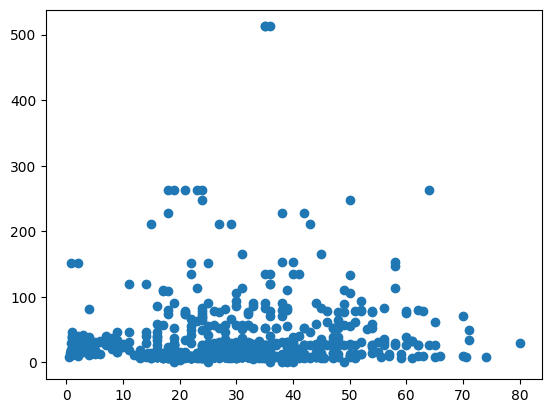

In [108]:
# Nuage de points
import matplotlib.pyplot as plt

plt.scatter(titanic['Age'], titanic['Fare'])

#### Autres graphiques

Pour tracer la courbe de la donnée `data2` en fonction de la donnée `data1` on utilise la syntaxe `titanic.plot(x="data1", y="data2")`.

Pour tracer sur un même graphique les courbes des données $\mathtt{data2}$ et $\mathtt{data3}$ en fonction de la donnée $\mathtt{data1}$ on utilise la syntaxe
`titanic.plot(x="data1", y=["data2", "data3"])`

In [ ]:
# Diagramme en boite
import matplotlib.pyplot as plt

titanic["Age"].plot.box(whis=[0,100],vert=False)
plt.title("Diagramme en boite de l'age des passagers")
plt.show()

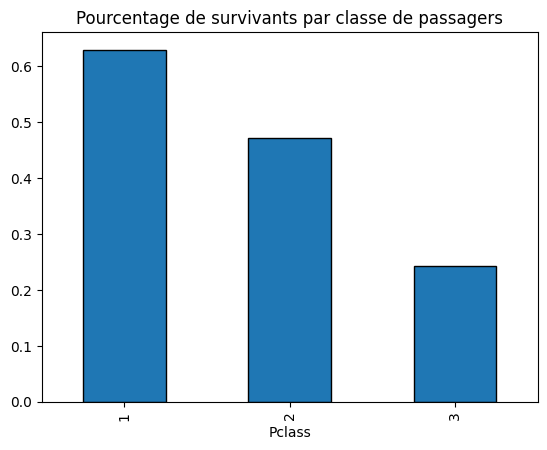

In [109]:
# Diagramme en bandes
import matplotlib.pyplot as plt

donnees = titanic.groupby("Pclass")["Survived"].mean()
donnees.plot.bar(width=0.5,edgecolor='black')
plt.title("Pourcentage de survivants par classe de passagers")
plt.show()

Les fonctions préimplémentées de visualisation de $\mathtt{Pandas}$ permettent de facilement visualiser plusieurs données ensemble (la syntaxe est ici détaillée sur les diagrammes en bandes mais est valable pour tous les tracés). 

In [110]:
titanic_group = titanic.groupby("Pclass").mean()   # on groupe les passagers par classe et on calcule la moyenne 
                                                   # de chaque colonne
titanic_group.plot.bar(y=["Survived","Fare"], secondary_y="Fare")  # on affiche le diagramme du nombre de survivants
                                                                   # et celui du prix du ticket
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

Lorsque les variables affichées ont des valeurs très différentes il faut considérer plusieurs échelles. Dans l'exemple précédent l'option $\mathtt{secondary}\_\mathtt{y}$ permet d'afficher les prix avec l'échelle de droite (ce qui est indiqué en légende) alors que le taux de survivant est indiqué dans l'échelle de gauche. 

On peut aussi aisément afficher plusieurs graphiques sans avoir à configurer le $\mathtt{subplot}$:

In [ ]:
titanic_group.plot.bar(y=["Survived","Fare"], subplots=True, layout=(2,1))
plt.show()